<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/08-normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. Normalization

1. ## Why Normalization is Important

Normalization (also referred to as *scaling*) is a common preprocessing step in time series analysis because it helps ensure that all variables contribute proportionally to the final model. Here are a few key reasons why normalization is important:

1. **Model Stability**  
   Many time series models (such as neural networks, regression models, and even traditional ARIMA-type models) can be sensitive to the absolute magnitude of the input data. When features vary wildly in scale—say, one in the range of millions and another in the range of fractions—model parameters may adjust disproportionately, possibly leading to unstable or suboptimal solutions. Normalizing the data helps keep feature scales consistent, improving training stability.

2. **Faster Convergence**  
   Gradient-based methods (like those used in neural networks) can converge more quickly and reliably when the input features are on a similar scale. Normalization can make the loss surface more “well-behaved,” helping the optimization algorithm find better solutions in fewer iterations.

3. **Equal Feature Importance**  
   If time series data contain multiple variables measured in different units (e.g., temperature in Celsius, wind speed in km/h, sales in dollars), large numerical ranges may dominate training. Normalizing features to a similar scale prevents any single variable from overpowering others simply due to its unit of measurement.

4. **Interpretability Across Segments**  
   Sometimes, you compare segments of a time series across different periods, product lines, or locations. Normalization makes these comparisons more direct and interpretable: changes or patterns in normalized data are easier to compare side by side because they’re on a shared, unitless scale.

5. **Outlier Management**  
   Many normalization approaches include robust techniques like *scaling with median and interquartile range (IQR)*, which can mitigate the impact of outliers in your time series. Outliers can skew statistics like the mean and variance, so applying a robust scaling method can improve model performance by reducing undue influence from extreme values.

## 2. Common Normalization Methods

1. **Min-Max Scaling**  
   Scales each feature $(x)$ to a fixed range $([a, b])$ (often $([0, 1])$):  
   $$
   x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}} (b - a) + a
   $$

2. **Standardization (Z-score)**  
   Transforms each feature to have zero mean and unit variance:  
   $$
   x_{\text{scaled}} = \frac{x - \mu}{\sigma}
   $$

3. **Robust Scaling**  
   Uses the median and IQR (interquartile range) to reduce the impact of outliers:  
   $$
   x_{\text{scaled}} = \frac{x - \text{median}(x)}{\text{IQR}(x)}
   $$

4. **Log Transform**  
   Sometimes used to help with right-skewed data (e.g., in financial or sales time series), although often combined with one of the above scaling approaches after the transform:  
   $$
   x_{\text{transformed}} = \log(x + 1)
   $$

## 3. Practical Considerations

In [12]:
# Imports and Data Creation

# In this example, we create a **synthetic time series** that mimics 
# a gradual upward trend with some noise.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# For reproducibility
np.random.seed(42)

# Generate synthetic time series data
n_samples = 100
time_index = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')

# Create a trend + noise
trend = 0.1 * np.arange(n_samples)
noise = np.random.normal(0, 1, n_samples)
data = trend + noise

df = pd.DataFrame({'Date': time_index, 'Value': data})
df.set_index('Date', inplace=True)

df.head()

,Value
Date,
2024-01-01,0.496714
2024-01-02,-0.038264
2024-01-03,0.847689
2024-01-04,1.823030
2024-01-05,0.165847


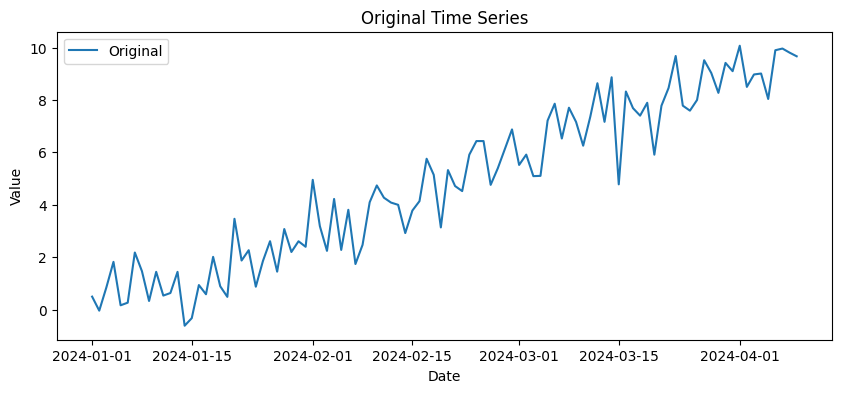

In [13]:
# Exploratory Plotting

# A quick look at the raw data:

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value'], label='Original')
plt.title("Original Time Series")
plt.ylabel("Value")
plt.xlabel("Date")
plt.legend()
plt.show()

**Normalization Techniques**

Below are a few common scalers. The choice of scaler often depends on the data distribution and the specific requirements of the modeling approach.

### 3.1 Standard Scaler

Removes the mean and scales to unit variance:

$$
\text{Scaled} = \frac{x - \mu}{\sigma}
$$

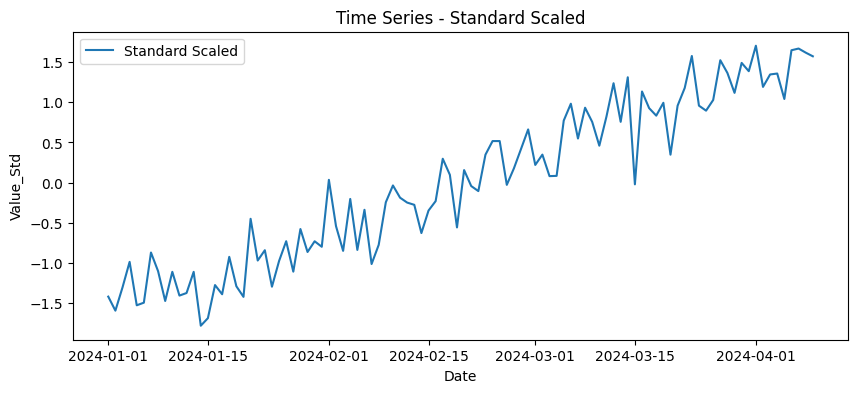

In [14]:
standard_scaler = StandardScaler()
df['Value_Std'] = standard_scaler.fit_transform(df[['Value']])

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value_Std'], label='Standard Scaled')
plt.title("Time Series - Standard Scaled")
plt.ylabel("Value_Std")
plt.xlabel("Date")
plt.legend()
plt.show()

### 3.2 Min-Max Scaler

Scales to a fixed range (default 0 to 1):

$$
\text{Scaled} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

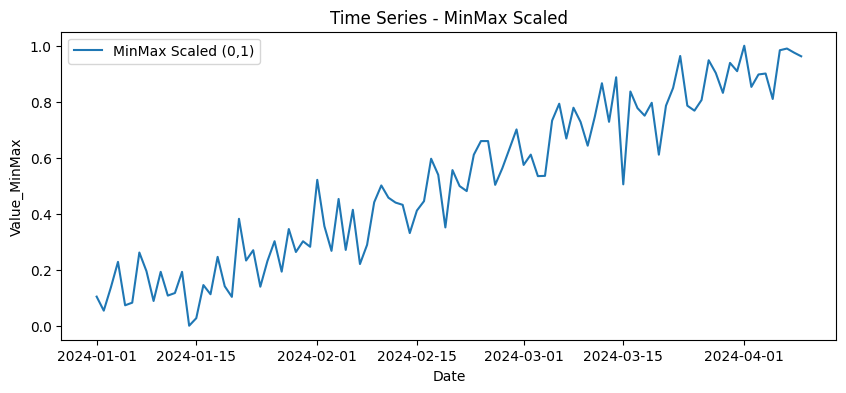

In [15]:
minmax_scaler = MinMaxScaler()
df['Value_MinMax'] = minmax_scaler.fit_transform(df[['Value']])

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value_MinMax'], label='MinMax Scaled (0,1)')
plt.title("Time Series - MinMax Scaled")
plt.ylabel("Value_MinMax")
plt.xlabel("Date")
plt.legend()
plt.show()

### 3.3 Robust Scaler

Removes the median and scales by the interquartile range, less sensitive to outliers:

$$
\text{Scaled} = \frac{x - \text{median}(x)}{\text{IQR}}
$$


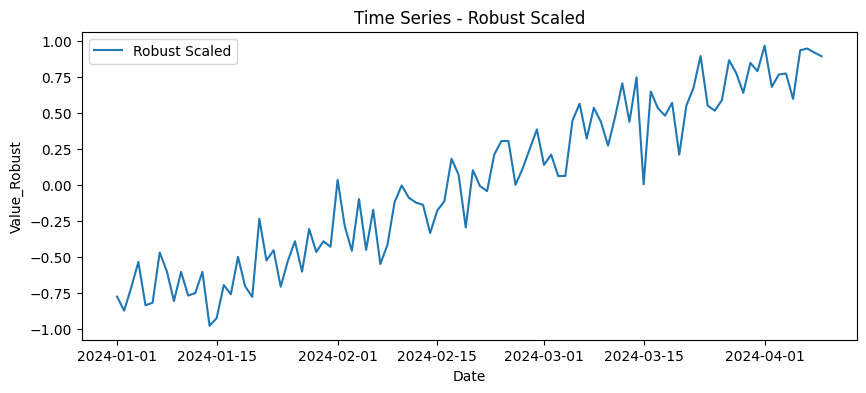

In [16]:
robust_scaler = RobustScaler()
df['Value_Robust'] = robust_scaler.fit_transform(df[['Value']])

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value_Robust'], label='Robust Scaled')
plt.title("Time Series - Robust Scaled")
plt.ylabel("Value_Robust")
plt.xlabel("Date")
plt.legend()
plt.show()

### 3.4 Example Model Fit on Normalized Data

Some models (e.g., neural networks, gradient-based methods) can benefit from normalized inputs. Below is a simplistic example using statsmodels’ **AR(1)** on the **Standard Scaled** data.

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings('ignore')

# Example: Fit an AR(1) on the original data
time_series_original = df['Value']
ar_model_original = AutoReg(time_series_original, lags=1, old_names=False)
ar_results_original = ar_model_original.fit()
print("AR(1) on Original Data")
print(ar_results_original.summary())

# Example: Fit an AR(1) on the standardized data
time_series_std = df['Value_Std']
ar_model_std = AutoReg(time_series_std, lags=1, old_names=False)
ar_results_std = ar_model_std.fit()
print("\n\n\nAR(1) on Standard Scaled Data")
print(ar_results_std.summary())

AR(1) on Original Data
                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -164.006
Method:               Conditional MLE   S.D. of innovations              1.268
Date:                Thu, 02 Jan 2025   AIC                            334.012
Time:                        15:52:04   BIC                            341.797
Sample:                    01-02-2024   HQIC                           337.162
                         - 04-09-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5177      0.238      2.174      0.030       0.051       0.984
Value.L1       0.9114      0.042     21.733      0.000       0.829       0.994
                             

1. **AR(1) Coefficient $(\approx 0.91)$**  
   - Highly significant in both models, indicating strong persistence.  
   - Since $|\phi| < 1$, the process is stationary, albeit close to the boundary.

2. **Intercept $(\text{const})$**  
   - Original data: $\approx 0.52$, **significant**.  
   - Standardized data: $\approx 0.03$, **not** significant (because scaling centers the series).

3. **AIC/BIC**  
   - Original scale: AIC $\approx 334$, BIC $\approx 342$.  
   - Standardized scale: AIC $\approx 112$, BIC $\approx 120$.  
   - These values **cannot be directly compared** across different data scales.

Overall, **scaling** changes the intercept and error magnitudes but **does not** affect the strong AR(1) persistence $(\phi \approx 0.91)$. Both models confirm a stationary process with a high dependence on the previous value.

**Key Takeaway**: Normalization can help certain methods converge faster or handle outliers, but in classical linear models (like basic AR or ARIMA), it’s often optional unless scaling differences across variables are large or the data contains extreme outliers.